# Module 5: Interpolation and Regression (Curve Fitting)

***Task:*** Given points
![!](https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Interpolation_Data.svg/300px-Interpolation_Data.svg.png)

we want to recover a function. For example, piecewise constant interpolation, or nearest-neighbor interpolation gives

![!](https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Piecewise_constant.svg/300px-Piecewise_constant.svg.png)

or linear spline interpolation --
![!](https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Interpolation_example_linear.svg/300px-Interpolation_example_linear.svg.png)

or polynomial interpolation 
![!](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Interpolation_example_polynomial.svg/300px-Interpolation_example_polynomial.svg.png)


## Polynomial interpolation via [Lagrange Interpolation](https://dlmf.nist.gov/3.3)

Given set of points x_given = $\{x_k\}_{k=0}^{n}$ and the value of the function at these points f_given = $\{f_k = f(x_k)\}_{k=0}^{n}$, the Lagrange interpolation polynomial $P_n(x)$ reads
$$
	P_n(x) = \sum_{k=0}^n l_k(x) f_k,
$$
where
$$
	l_k(x) = \prod_{j=0, \atop j\neq k}^n \frac{x - x_j}{x_k - x_j}.
$$

In [16]:
function lagrange_interp(x_given, f_given, x_eval)
    
    # consistency check
    @assert length(x_given) == length(f_given)
    
    P = zeros(length(x_eval))
    
    for k = 1:length(x_given)
       lₖ = ones(length(x_eval))
        
        for j = 1:length(x_given)
            if j ≠ k
               lₖ .*= (x_eval .- x_given[j]) ./ (x_given[k] - x_given[j])
            end
        end
        
        P .+= lₖ * f_given[k]
    end
    
    return P
end

lagrange_interp (generic function with 1 method)

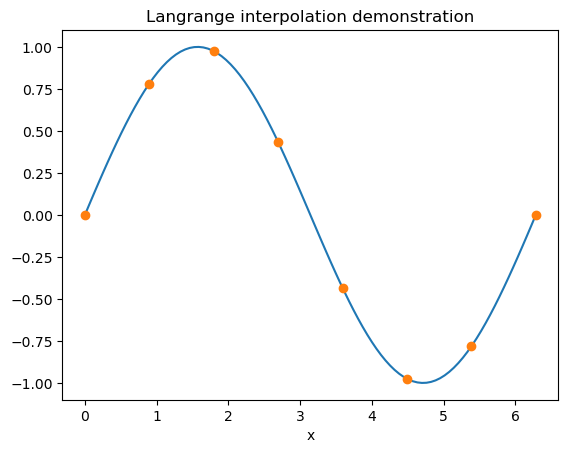

In [21]:
using PyPlot

x_given = range(0, 2 * π, 8)
f_given = sin.(x_given)

x_eval = range(0, 2 * π, 100)

title("Langrange interpolation demonstration")
plot(x_eval, lagrange_interp(x_given, f_given, x_eval))
plot(x_given, f_given, "o")
xlabel("x")
show()

## Curve fitting via matrix algebra

The Lagrange interpolation polynomial can be constructed in a different way: Given the input data $\{x_k\}_{k=1}^n$ and $\{f_k = f(x_k)\}_{k=1}^n$, we need to find the coefficients $a_1, \ldots, a_n$ such that
$$
    \sum_{j=1}^n a_j x_k^{j - 1} = f_k, 
    \qquad k = 1, \ldots, n.
$$

The latter can be written as the matrix equation for the unknown vector $\begin{pmatrix} a_1 & a_2 & \ldots & a_n \end{pmatrix}^T$
$$
\underbrace{\begin{pmatrix}
    1 & x_1 & x_1^2 & \ldots & x_1^{n-1} \\
    1 & x_2 & x_2^2 & \ldots & x_2^{n-1} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_n & x_n^2 & \ldots & x_n^{n-1} 
\end{pmatrix}}_{\text{This is known as the Vandermonde matrix}}
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_n 
\end{pmatrix}
=
\begin{pmatrix}
    f_1 \\
    f_2 \\
    \vdots \\
    f_n 
\end{pmatrix}
$$

In [ ]:
function lagrange_interp_matrix(x_given, f_given, x_eval)
    
    # consistency check
    @assert length(x_given) == length(f_given)
    
    n = length(x_given)
    
    # Step 1: get the Vandermonde matrix
    Vandermonde = ones(n, n)
    
    for k = 2:n
        
    end
end